In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
netflix_data = pd.read_csv('./netflix_titles.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


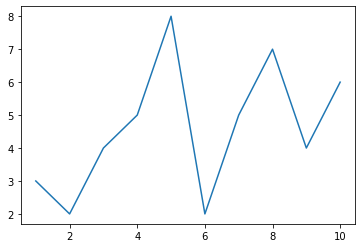

In [7]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5,6,7,8,9,10], [3,2,4,5,8,2,5,7,4,6])

Text(0.5, 1.0, 'Data Science visualization')

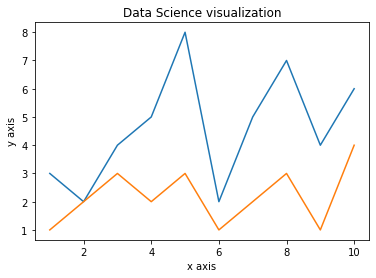

In [8]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5,6,7,8,9,10], [3,2,4,5,8,2,5,7,4,6], label = 'data1')
ax.plot([1,2,3,4,5,6,7,8,9,10], [1,2,3,2,3,1,2,3,1,4], label = 'data2')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_title("Data Science visualization")

In [9]:
n_data = netflix_data.groupby(['release_year', 'type'], as_index=False).show_id.count()
n_data.columns = ['release_year', 'type', 'count']
n_data_pivot = n_data.pivot(index='release_year', columns='type', values='count').reset_index()
n_data_pivot.fillna(0, inplace=True)
n_data_pivot.head()

type,release_year,Movie,TV Show
0,1925,0.0,1.0
1,1942,2.0,0.0
2,1943,3.0,0.0
3,1944,3.0,0.0
4,1945,3.0,0.0


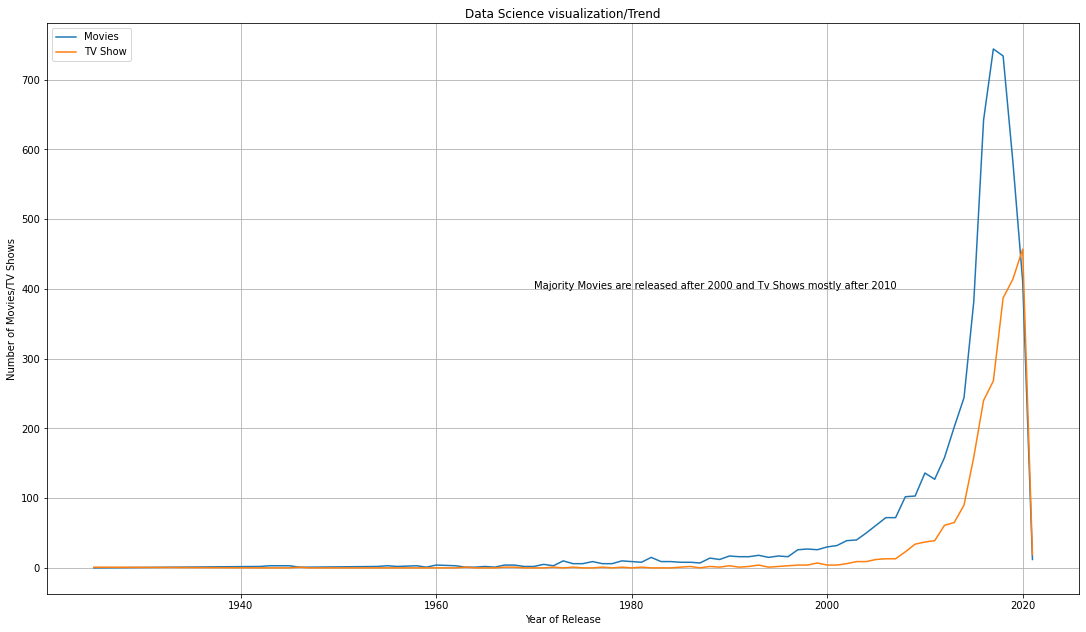

In [10]:
fig,ax = plt.subplots()
ax.plot(n_data_pivot.release_year, n_data_pivot.Movie, label='Movies')
ax.plot(n_data_pivot.release_year, n_data_pivot['TV Show'], label= 'TV Show')
ax.set_ylabel('Number of Movies/TV Shows')
ax.set_xlabel('Year of Release')
ax.set_title("Data Science visualization/Trend")
plt.text(x=1970, y=400, s=r'Majority Movies are released after 2000 and Tv Shows mostly after 2010')
fig.set_size_inches(18.5,10.5)
plt.grid()
ax.legend()

In [11]:
netflix_data = pd.read_csv('./netflix_titles.csv')
netflix_data['year_added'] = netflix_data['date_added'].str.slice(start=-4)
n_data_added = netflix_data.groupby(['year_added', 'type'], as_index=False).show_id.count()
n_data_added.columns = ['year_added', 'type', 'count']
n_data_added = n_data_added.pivot(index='year_added', columns='type', values='count').reset_index()
n_data_added.fillna(0, inplace = True)
n_data_added.head()

type,year_added,Movie,TV Show
0,2008,1.0,1.0
1,2009,2.0,0.0
2,2010,1.0,0.0
3,2011,13.0,0.0
4,2012,3.0,0.0


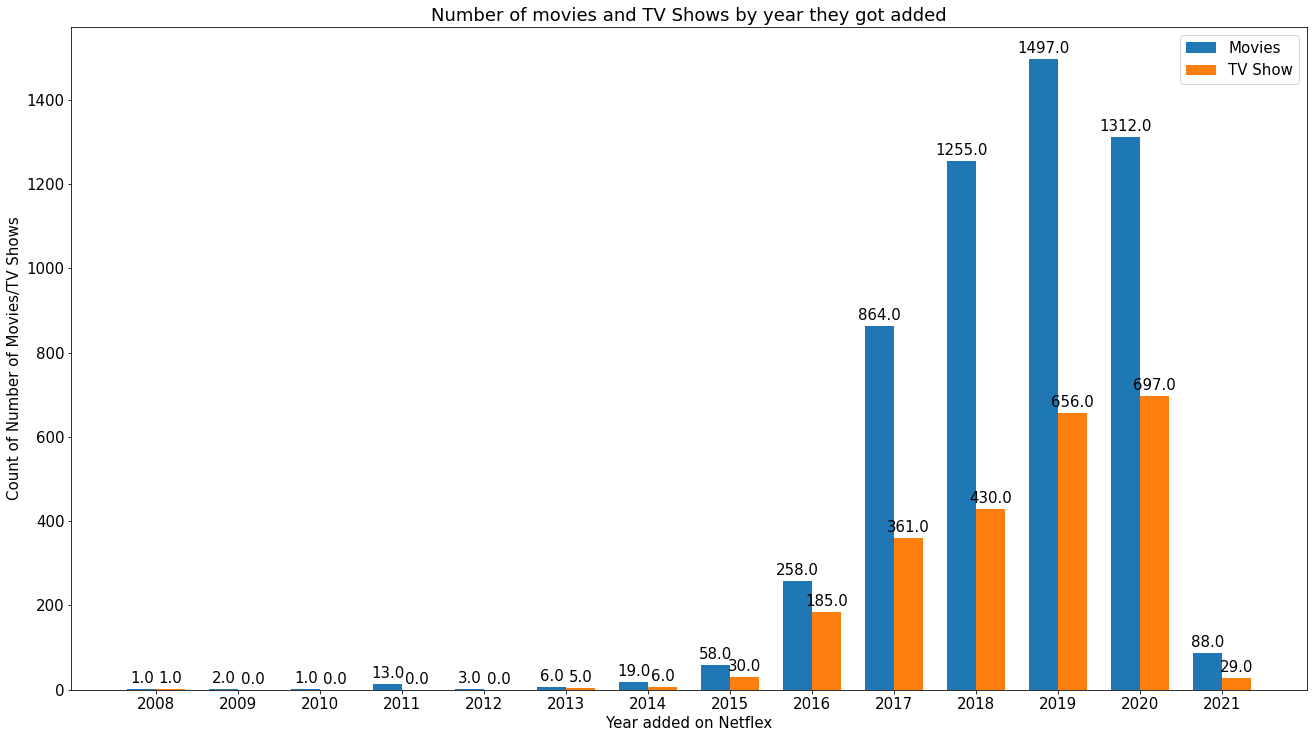

In [14]:
labels = n_data_added['year_added']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
Movies_rects = ax.bar(x - width/2, n_data_added['Movie'], width, label='Movies') # Add color here
TVshows_rects = ax.bar(x + width/2, n_data_added['TV Show'], width, label='TV Show')

# Add some text for labels, title, configure chart size
ax.set_xlabel('Year added on Netflex')
ax.set_ylabel('Count of Number of Movies/TV Shows')
ax.set_title('Number of movies and TV Shows by year they got added')
ax.set_xticks(x)
ax.set_xticklabels(labels)
fig.set_size_inches(18.5, 10.5)
plt.rcParams.update({'font.size': 15})
ax.legend()

 #Function to generate labels on top of the bars
def gen_label(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


gen_label(Movies_rects)
gen_label(TVshows_rects)

fig.tight_layout()
plt.show()